In [ ]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from dataset import prepare_datasets

def visualize_single_sample(image, mask, index):
    # Create a new figure for this sample
    fig, axes = plt.subplots(1, 3, figsize=(15, 4))
    
    # Convert image to numpy and transpose from CHW to HWC
    img_np = image.numpy().transpose(1, 2, 0)
    # Normalize values to [0, 1] if needed
    if img_np.max() > 1.0:
        img_np = img_np / 255.0
    
    # Convert mask to numpy and squeeze
    mask_np = mask.numpy().squeeze()
    
    # Create masked image
    masked_img = img_np.copy()
    masked_img = masked_img * np.stack([mask_np, mask_np, mask_np], axis=2)
    
    # Display original image
    axes[0].imshow(img_np)
    axes[0].set_title(f"Original Image {index+1}")
    axes[0].axis('off')
    
    # Display mask
    axes[1].imshow(mask_np, cmap='gray')
    axes[1].set_title(f"Mask {index+1}")
    axes[1].axis('off')
    
    # Display masked image
    axes[2].imshow(masked_img)
    axes[2].set_title(f"Masked Image {index+1}")
    axes[2].axis('off')
    
    plt.tight_layout()
    plt.show()

def visualize_dataset(dataset, num_samples=5):

    for i in range(num_samples):
        if i >= len(dataset):
            break
            
        image, mask = dataset[i]
        visualize_single_sample(image, mask, i)

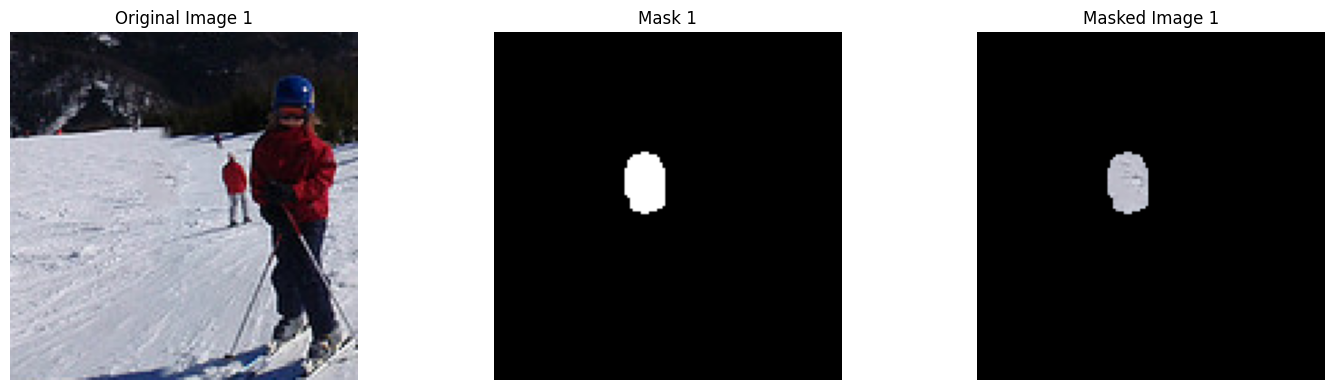

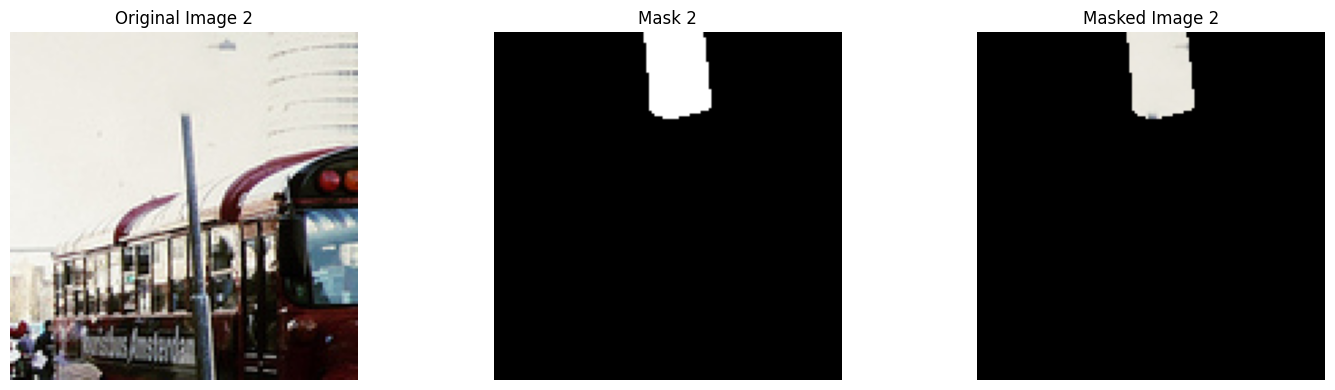

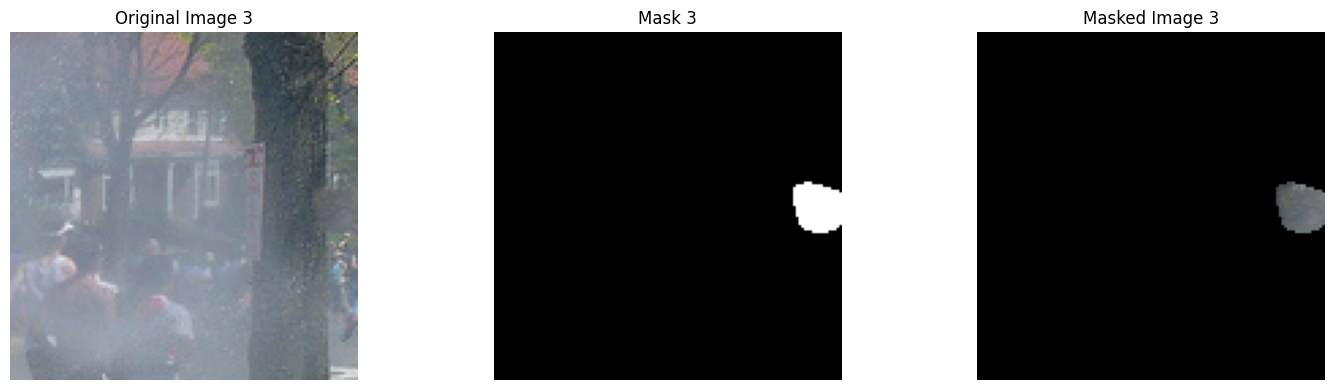

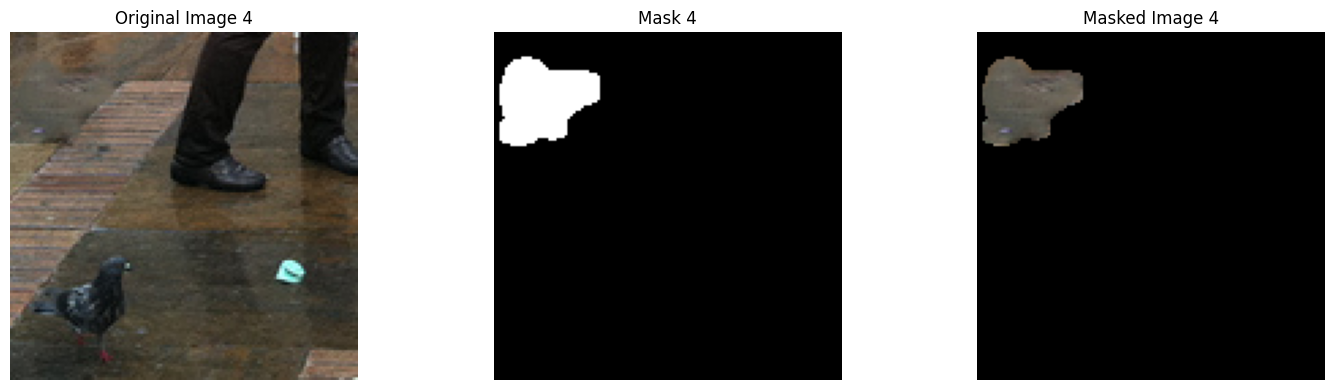

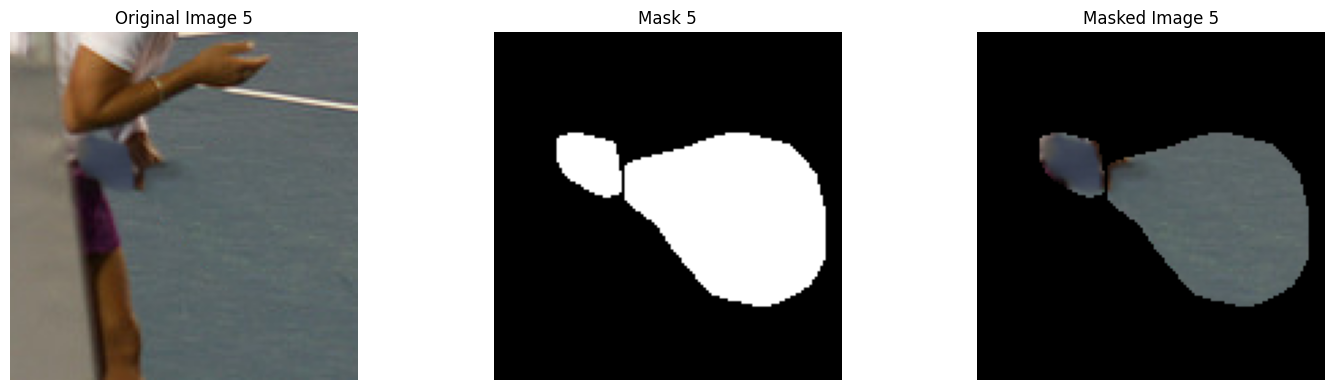

In [2]:
DATA_DIR = './Datasets/'
TRAIN_INPUT_IMAGES_FILE  = 'defacto_train_input_images.pt'
TRAIN_TARGET_IMAGES_FILE = 'defacto_train_target_images.pt'
VALID_INPUT_IMAGES_FILE  = 'defacto_valid_input_images.pt'
VALID_TARGET_IMAGES_FILE = 'defacto_valid_target_images.pt'


train_dataset, valid_dataset, train_size, valid_size = prepare_datasets(
    restart_mode=False,
    data_dir=DATA_DIR,
    train_input_file=TRAIN_INPUT_IMAGES_FILE,
    train_target_file=TRAIN_TARGET_IMAGES_FILE,
    valid_input_file=VALID_INPUT_IMAGES_FILE,
    valid_target_file=VALID_TARGET_IMAGES_FILE
)

# Usage example
visualize_dataset(train_dataset, num_samples=5)